**Double click here and enter the student numbers for all minigroup members. Don't enter any names.**
1. **First student number** 21022248
2. **Second student number** 21003825
3. **Third student number.**

Before you start work on the project, **[click on this link to read the MATH0011 project instructions.](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html)**

# Project 6 - The Gibbs Phenomenon

This project is about a strange occurence in the theory of [Fourier series](https://en.wikipedia.org/wiki/Fourier_series).  You don't need to have any previous knowledge of Fourier series (which are covered in [MATH0016 Methods 3](https://www.ucl.ac.uk/maths/sites/maths/files/math0016.pdf)) to complete this project.

In your analysis modules you looked at power series representations for functions - for example, you can represent the function $f(x) = e^x$ by a series
$$ \sum_{i=0}^\infty \frac{x^i}{i!}.$$
A power series for a function $f$ expresses $f(x)$ as a sum of multiples of powers of $x$.  Fourier series are similar, but they represent functions as sums of multiples of functions of the form $\sin(nx)$ and $\cos(mx)$.



The first cell below imports some functions that you will need for plotting.

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

## Part 1

Write a function `partial_sum(x, n)` whose output is

$$ \sum_{i=0}^n \frac{\sin((2i+1)x)}{2i+1}. $$

One way to do this is with a list comprehension producing

$$[ \sin(x), \sin(3x)/3, \sin(5x)/5, \dots ] $$

together with the `sum` function, but you can use any method you want.

In [7]:
def partial_sum(x ,n):
    '''
    input: a nonnegative number n and a variable x
    output: the sum of the seires from i =0 to n
    '''
    sum = 0
    for i in range(n + 1): # Using for loop to repeatedly add the next term n+1 times
        sum = sum + (math.sin((2 * i + 1) * x))/(2 * i + 1)
    return sum

Your `partial_sum` function is an example of a partial sum of a Fourier series. Specifically, this is the Fourier series representation of the square wave function which you will plot in the next exercise.

## Part 2

The function `square_wave(x)` is defined by
$$ \mathtt{square\_wave}(x) = \begin{cases} 
-\pi/4 & x < 0 \\
\pi/4 & 0 \leq x \leq \pi \\
-\pi/4 & \pi < x \leq 2\pi \\
\pi/4 & x \geq 2\pi\end{cases}$$
Plot the graph of `square_wave(x)` for $-0.2 \leq x \leq 2\pi + 0.2$ using `plt.plot`.  On the same axes plot `partial_sum(x, n)` for `n = 3`, and `n=15`.

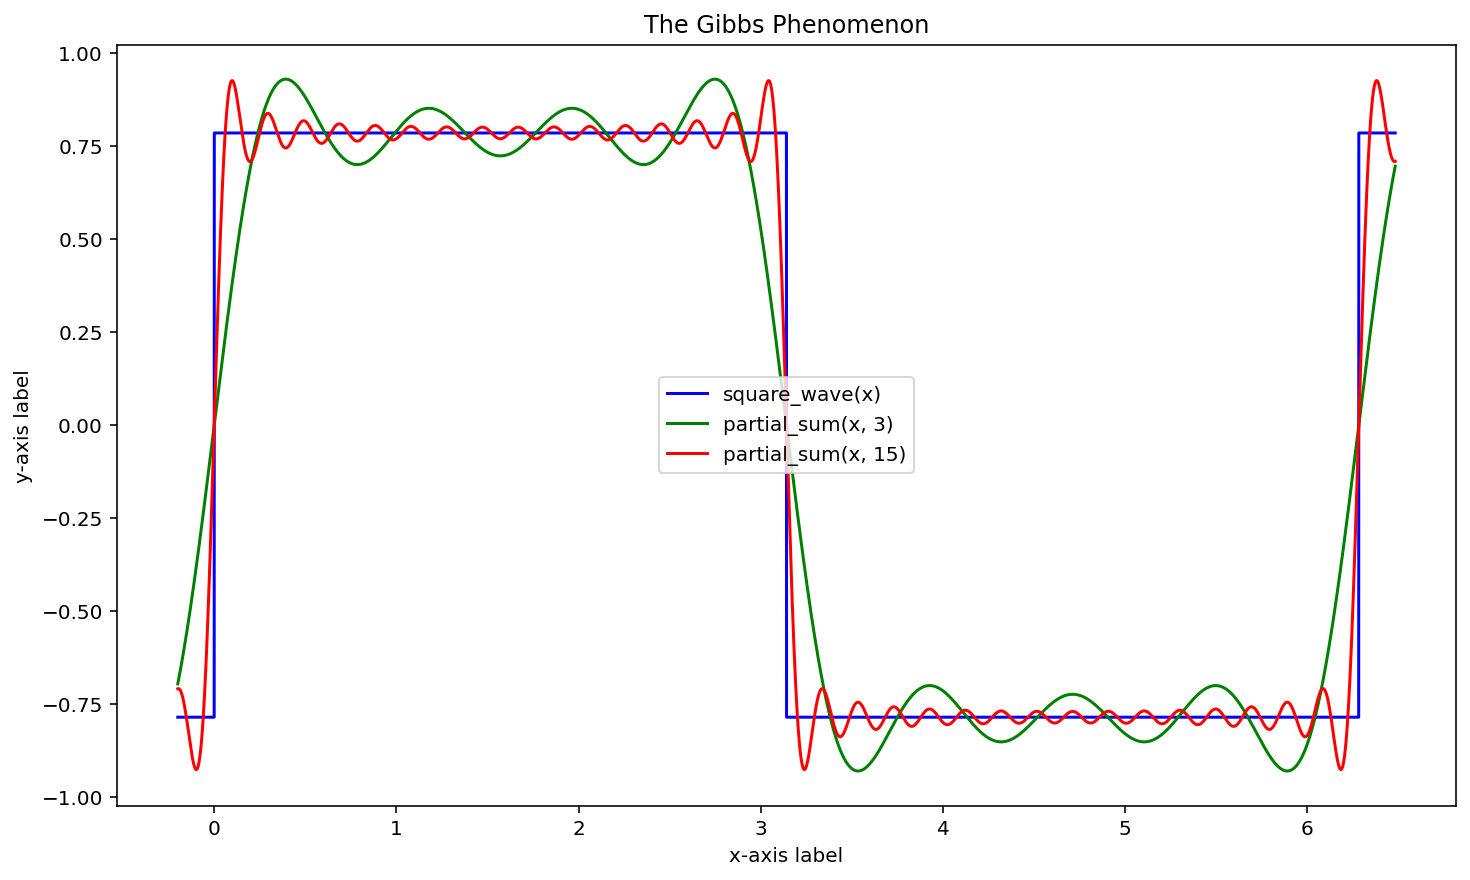

In [8]:
def square_wave(x):
    fx = 0 # Using conditional statement to construct the above piecewise funtion
    if x < 0:
        fx = -(math.pi) / 4
    elif 0 <= x and x <= math.pi:
        fx = (math.pi) / 4
    elif math.pi <= x and x <= 2 * math.pi:
        fx = -(math.pi) / 4
    elif x >= 2 * math.pi:
        fx = (math.pi) / 4
    return fx
xs = np.linspace(-0.2, 0.2 + 2 * math.pi, 10000) # Create 10000 evenly spaced points starting from -0.2 to 2pi + 0.2
ys = [square_wave(x) for x in xs] # Create a list containing the value of square_wave function at each x in xs
zs = [partial_sum(x, 3) for x in xs]
ts = [partial_sum(x, 15) for x in xs]
plt.plot(xs, ys, 'b', label = 'square_wave(x)') # Plot the square_wave funtion with respect to x
plt.plot(xs, zs, 'g', label = 'partial_sum(x, 3)')
plt.plot(xs, ts, 'r', label = 'partial_sum(x, 15)')
plt.xlabel("x-axis label")
plt.ylabel("y-axis label")
plt.title('The Gibbs Phenomenon')
plt.legend()

You are familiar with the fact that power series don't always converge - that's why you spend so much time in Analysis 1 thinking about radii of convergence.  Fourier series also have interesting convergence behaviour.  Your plots should show a special behaviour of Fourier series called the *Gibbs phenomenon*, where the partial sums are larger than the value of `square_wave(x)` for values of $x$ near to where `square_wave(x)` jumps from positive to negative.  In the next exercise you will investigate exactly how large is the difference between the partial sums and the square wave.

## Part 3

**Compute an approximation to $I = \int_0 ^\pi \operatorname{sinc}(t) \mathrm{d}t$, where**

$$ \operatorname{sinc}(x) = \begin{cases} 1 & x = 0 \\ \frac{\sin(x)}{x} & x \neq 0 \end{cases}.$$

You can either do this by using the code for the rectangle rule from our weekly notebooks, or by importing a command from one of the modules included with Anaconda - try searching the online documentation for numpy and scipy.

**Then, on the same axes, plot `partial_sum(x, 100)`, `square_wave(x)`, and the lines $y = \pm \frac I2$** for $-0.2 \leq x \leq 2\pi + 0.2$.
You should see that the straight lines $y = \pm \frac I2$ show exactly how much the partial sums of the Fourier series differ from the square wave near to the points where the square wave changes value.




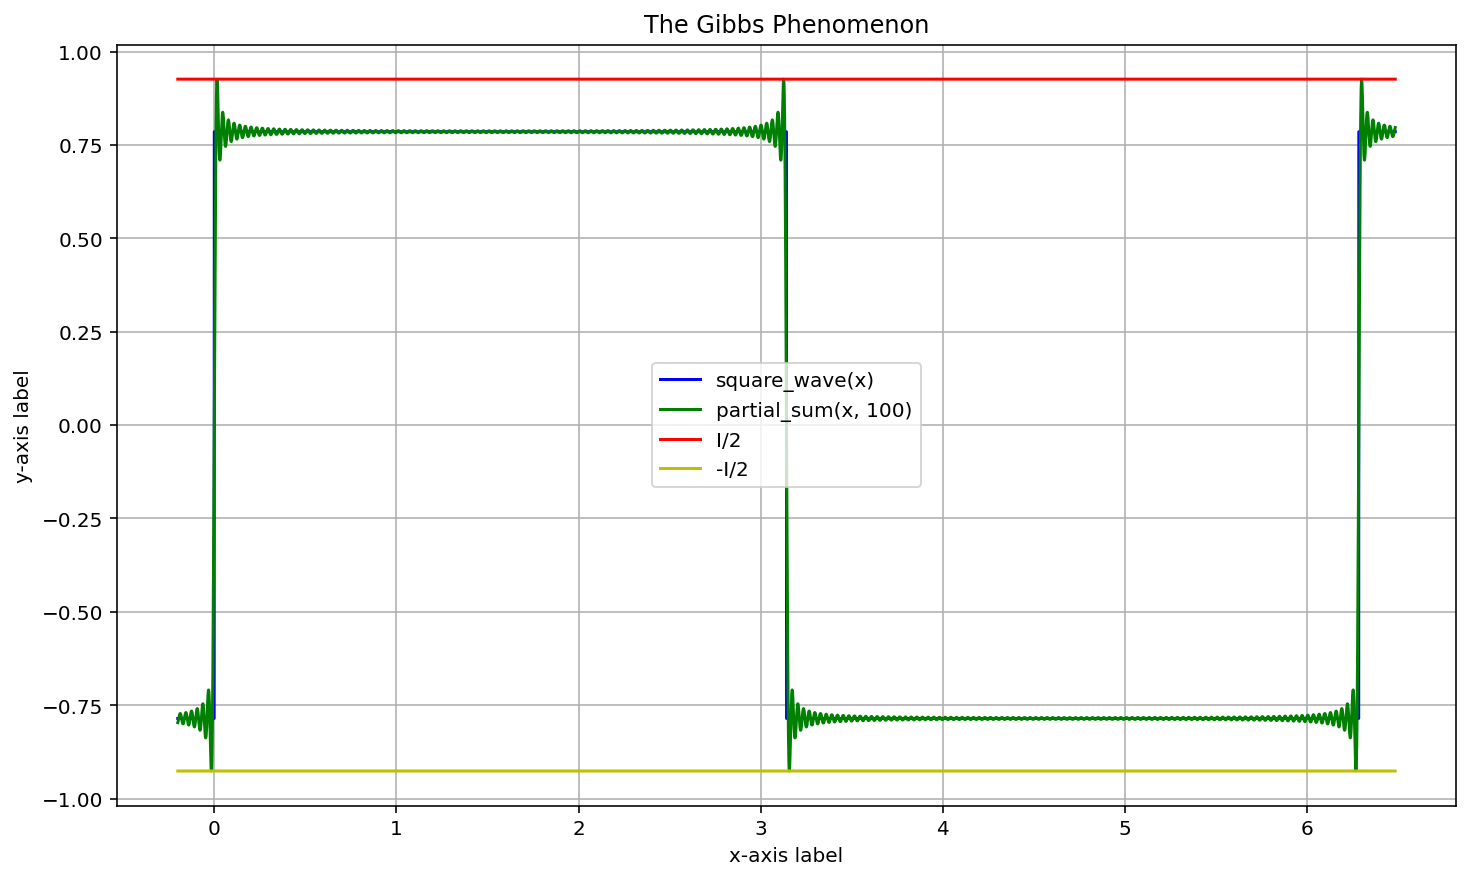

In [9]:
def sinc(x):
    sinc = 0
    if x == 0:
        sinc = 1
    else:
        sinc = (math.sin(x)) / x
    return sinc
def rectangle_rule(f, a, b, N): # Approximating an integral by adding the area of N reactangles with width (b-a)/N and height f( a + (b - a) * i / N )
    vertical = 0
    for i in range(N):
        vertical = vertical + f( a + (b - a) * i / N )
    return (b - a) / N * vertical
I = rectangle_rule(sinc, 0, math.pi, 10000)
xs = np.linspace(-0.2, 0.2 + 2 * math.pi, 10000)
ys = [square_wave(x) for x in xs]
zs = [partial_sum(x, 100) for x in xs]
ts = [I / 2 for x in xs] # Create a list containing one half the value of this constant function with respect to x
hs = [-I / 2 for x in xs]
plt.plot(xs, ys, 'b', label = 'square_wave(x)')
plt.plot(xs, zs, 'g', label = 'partial_sum(x, 100)')
plt.plot(xs, ts, 'r', label = 'I/2')
plt.plot(xs, hs, 'y', label = '-I/2')
plt.title('The Gibbs Phenomenon')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.legend()
plt.grid()

## Part 4

Multiplying the $i$th term in the partial sum

$$\sum_{i=0}^n \frac{\sin((2i+1)x)}{2i+1}$$

by the  [*Lanczos  sigma factor*](http://mathworld.wolfram.com/LanczosSigmaFactor.html) $\operatorname{sinc}\left(\frac{(2i+1)\pi}{4n}\right)$ gives a new function

$$\mathtt{lanczos\_partial\_sum}(x,n) = \sum_{i=0}^n \operatorname{sinc}\left(\frac{(2i+1)\pi}{4n}\right) \frac{\sin((2i+1)x)}{2i+1}.$$


On the same axes, plot `lanczos_partial_sum(x, 100)`, `square_wave(x)`, and the lines $y = \pm \frac I2$.  You will see that the Gibbs phenomenon is reduced, but not eliminated.

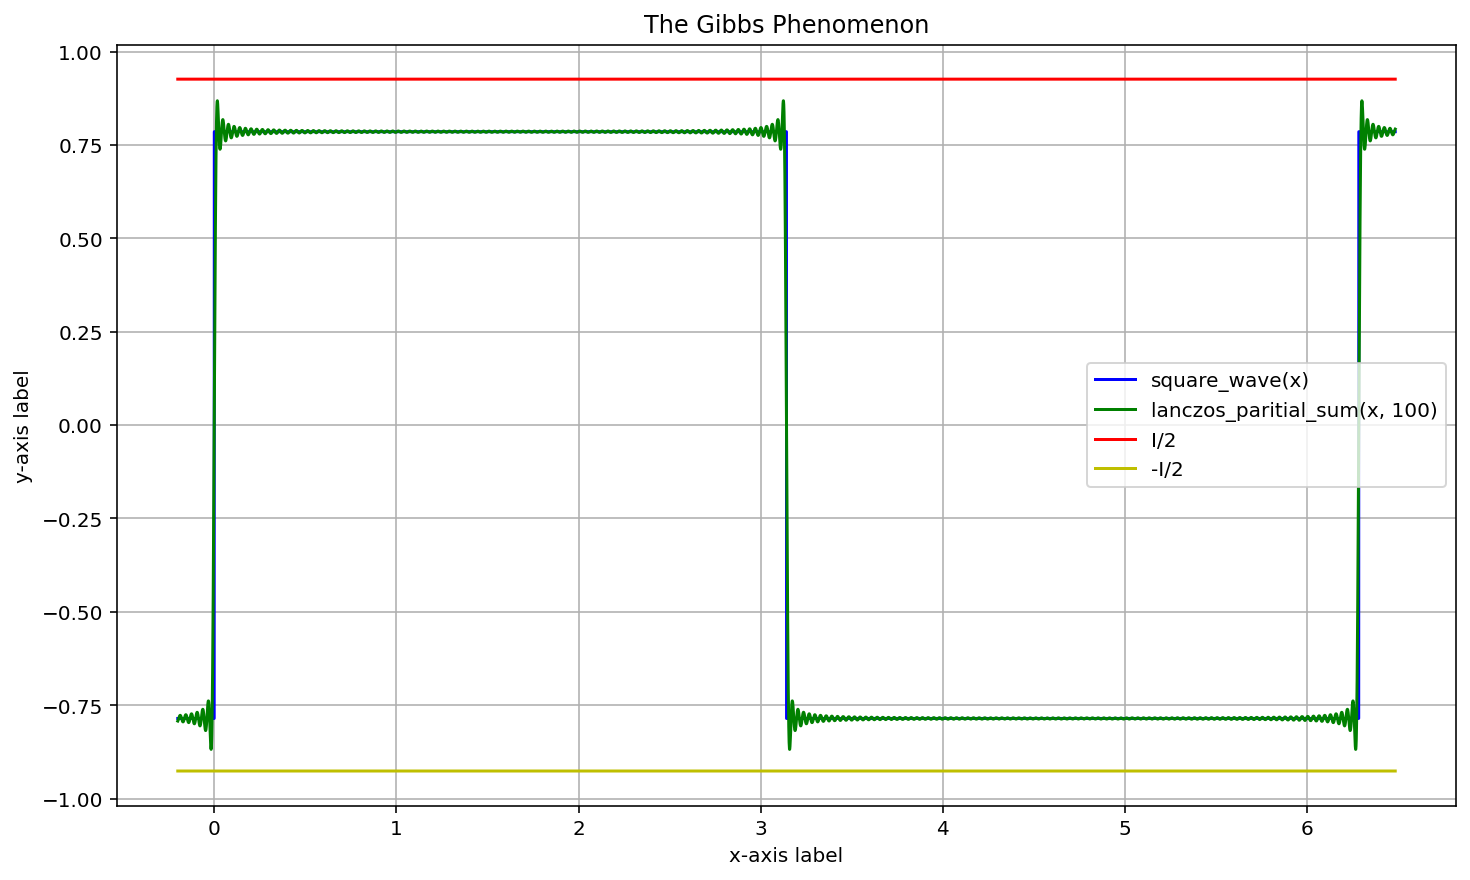

In [10]:
def lanczos_paritial_sum(x, n):
    sum = 0
    for i in range(n + 1):
        sum = sum + sinc((2 * i + 1) * math.pi / (4 * n)) * (math.sin((2 * i + 1) * x))/(2 * i + 1)
    return sum
I = rectangle_rule(sinc, 0, math.pi, 10000)
xs = np.linspace(-0.2, 0.2 + 2 * math.pi, 10000)
ys = [square_wave(x) for x in xs]
zs = [lanczos_paritial_sum(x, 100) for x in xs]
ts = [I / 2 for x in xs]
hs = [-I / 2 for x in xs]
plt.plot(xs, ys, 'b', label = 'square_wave(x)')
plt.plot(xs, zs, 'g', label = 'lanczos_paritial_sum(x, 100)')
plt.plot(xs, ts, 'r', label = 'I/2')
plt.plot(xs, hs, 'y', label = '-I/2')
plt.title('The Gibbs Phenomenon')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.legend()
plt.grid()

# Submitting your project

Have you done all of the following things?

0. Included **all** minigroup members' student numbers at the top of this notebook.
1. Read through every exercise to check you have answered every part.
1. Carefully read and followed all of the [MATH0011 project instructions](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html).
1. Checked that all of the code in this notebook works correctly.

If you have, you're ready to submit. One minigroup member only should download the completed notebook (in CoCalc, click the File menu next to the green Save button, then click Download) and submit it on the MATH0011 Moodle. Please submit **only one file per minigroup.**